<a href="https://colab.research.google.com/github/GabeGD/Bootcamp_Geracao_Tech_Unimed_BH_Ciencia_de_Dados/blob/main/cinema_brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Listagem de Filmes Brasileiros Lan√ßados de 1995 a 2021 üé¶

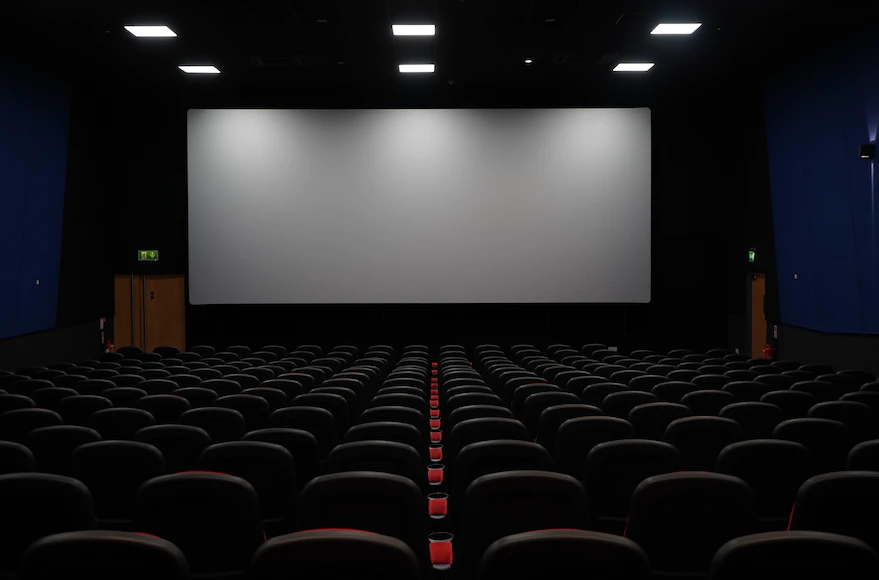

Esta an√°lise de dados √© referente a Listagem de Filmes Brasileiros Lan√ßados de 1995 a 2021, documento publicado em 05/08/2022, dispon√≠vel em: https://www.gov.br/ancine/pt-br/oca/cinema/arquivos.csv/listagem-de-filmes-brasileiros-lancados-1995-a-2021-3.csv

Ser√° feita limpeza do dataframe e investiga√ß√£o de algumas vari√°veis de interesse, como maior e menor renda obtida no ano de lan√ßamento do filme em quest√£o e quantidade de filmes nacionais lan√ßados por ano.

fonte da imagem: Unsplash.com

##Importando bibliotecas

In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt

##Lendo arquivo .csv

In [37]:
df=pd.read_csv("/content/listagem-de-filmes-brasileiros-lancados-1995-a-2021-3.csv", delimiter=';',na_values='-')

##Conferindo parte superior do dataframe

In [38]:
df.head()

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
0              1995                          B0400064200000   
1              1995                          B0500310700000   
2              1995                          B0500264600000   
3              1995                                     NaN   
4              1995                          B0300012900000   

                                    T√≠tulo                    Dire√ß√£o  \
0                          A Causa Secreta             S√©rgio Bianchi   
1     Carlota Joaquina, Princesa Do Brazil             Carla Camurati   
2  Carmen Miranda - Bananas Is My Business             Helena Solberg   
3                       Cinema De L√°grimas  Nelson Pereira Dos Santos   
4                              Efeito Ilha       Luiz Alberto Pereira   

         G√™nero Empresa Produtora Brasileira Majorit√°ria  UF  \
0        Fic√ß√£o        Agravo Produ√ß√µes Cinematogr√°ficas  SP   
1        Fic√ß√£o            Copacabana Filmes E Produ√ß√µes  RJ   
2  Document√°rio                          Radiante Filmes  RJ   
3        Fic√ß√£o                     Meta V√≠deo Produ√ß√µes  RJ   
4        Fic√ß√£o                                 Lapfilme  SP   

  Empresa Produtora Minorit√°ria Brasileira  UF2 Distribuidora M√°ximo de Salas  \
0                                      NaN  NaN      Riofilme              ND   
1                                      NaN  NaN        Elimar              33   
2                                      NaN  NaN      Riofilme              ND   
3                                      NaN  NaN      Riofilme              ND   
4                                      NaN  NaN      Riofilme              ND   

     P√∫blico    Renda (R$)  Unnamed: 13  
0      3.000     15.000,00          NaN  
1  1.286.000  6.430.000,00          NaN  
2     15.470     90.000,00          NaN  
3      1.575      7.500,00          NaN  
4      3.000     15.000,00          NaN

##Informa√ß√µes Gerais

"Fontes:
ANCINE - SALIC (Sistema de Apoio √†s Leis de Incentivo √† Cultura) e ANCINE - SADIS (Sistema de Acompanhamento da Distribui√ß√£o em Salas de Exibi√ß√£o), Filme B e Apura√ß√£o ANCINE, SCB (Sistema de Controle de Bilheteria).
Dados de renda, p√∫blico e salas:
2021: ANCINE/SCB (Sistema de Controle de Bilheteria) - Dados compilados em 14/04/2022
2020: ANCINE / SADIS (Sistema de Acompanhamento da Distribui√ß√£o em Salas de Exibi√ß√£o) - Dados compilados em 16/08/2021.
2019: ANCINE / SADIS (Sistema de Acompanhamento da Distribui√ß√£o em Salas de Exibi√ß√£o) - Dados compilados em 04/05/2020.
2018: ANCINE / SADIS (Sistema de Acompanhamento da Distribui√ß√£o em Salas de Exibi√ß√£o) - Dados compilados em 22/02/2019.
2016 e 2017: ANCINE / SADIS (Sistema de Acompanhamento da Distribui√ß√£o em Salas de Exibi√ß√£o) - Dados compilados em 02/04/2018.
2009 a 2015: ANCINE / SADIS (Sistema de Acompanhamento da Distribui√ß√£o em Salas de Exibi√ß√£o) - Dados compilados em 22/12/2017.
1995 a 2008: Filme B.
Observa√ß√µes:
1. Para um filme ser considerado brasileiro, ele deve possuir o Certificado de Produto Brasileiro (CPB).
2. Para um melhor alinhamento com o mercado internacional, as obras registradas na ANCINE com distribui√ß√£o da Paramount, que atua no Brasil tamb√©m comercializando obras dos est√∫dios Universal, foram desagregadas entre as duas empresas, seguindo o padr√£o de distribui√ß√£o no exterior.
3. Nos dados a partir de 2009, os dados de renda e p√∫blico s√£o relativos ao ano de lan√ßamento do filme, acrescido de pr√©-estreias e exibi√ß√µes em anos posteriores.
4. Nos dados a partir de 2009, a distribuidora √© a empresa que realizou a distribui√ß√£o do filme na semana de seu lan√ßamento.
5. As UF's seguem a ordem das colunas de Empresas Produtoras.
6. ND: dados n√£o dispon√≠veis at√© a data de compila√ß√£o dos dados.
7. Os valores dispon√≠veis nesse arquivo s√£o valores correntes do ano de refer√™ncia.
8. Na atualiza√ß√£o deste arquivo publicada em 28/03/2022, os dados referentes ao ano de 2019 sofreram corre√ß√µes, em virtude de inconsist√™ncias encontradas. Nestas altera√ß√µes, destacamos, dentre outras, a exclus√£o de filmes que n√£o se enquadravam como longa-metragem, a corre√ß√£o de datas de lan√ßamento e g√™neros cinematogr√°ficos, bem como, atualiza√ß√µes de informa√ß√µes sobre distribuidoras, a partir de novas informa√ß√µes. Os n√∫meros referentes ao ano de 2019, no entanto, continuam refletindo a posi√ß√£o no Sistema Ancine de Distribui√ß√£o (SADIS) em 04/05/2020. 
Notas:
1. Empresa Produtora Brasileira Majorit√°ria: √© a empresa produtora brasileira com maior percentual de cota patrimonial, de acordo com dados dispon√≠veis no campo Produtor do Certificado de Produto Brasileiro (CPB).
"a. Nos casos em que a informa√ß√£o sobre cota patrimonial n√£o estava dispon√≠vel no CPB foram inseridas todas as produtoras listadas no campo ‚Äúprodutor‚Äù em ordem alfab√©tica;"
"b. Nos casos em que n√£o havia a informa√ß√£o de produtor no CPB, a empresa requerente foi considerada como produtora majorit√°ria brasileira;"
"c. Nos casos de mais de uma produtora majorit√°ria, as empresas foram colocadas em ordem alfab√©tica;"
"d. Nos casos em que n√£o havia CPB, foi considerada a informa√ß√£o dispon√≠vel no SALIC;"
e. Nos casos em que n√£o havia CPB e SALIC, foi considerada a informa√ß√£o publicada anteriormente no arquivo Listagem de Filmes Brasileiros 1995 a 2016, no OCA.
2. Empresa Produtora Minorit√°ria Brasileira: √© a empresa produtora brasileira com menor percentual de cota patrimonial, de acordo com dados dispon√≠veis no campo Produtor do Certificado de Produto Brasileiro (CPB).
"a.¬†Em caso de mais de uma empresa produtora minorit√°ria, as empresas foram colocadas em ordem decrescente de percentual patrimonial, ou seja, aparece primeiro a empresa que tem o maior percentual;"
b. Nos casos em que o percentual era igual, as empresas foram colocadas em ordem alfab√©tica.
3. Para o nome das empresas produtoras, foi considerado o nome fantasia, quando dispon√≠vel no Registro Econ√¥mico do Sistema Ancine Digital (SAD), ou o nome de mercado das mesmas. Em caso de d√∫vidas, quando dispon√≠vel, foi consultado o trailer do filme para defini√ß√£o do nome da empresa delas.
4. Para defini√ß√£o da UF da empresa produtora, foi considerado o endere√ßo fiscal da mesma, de acordo com o Registro Econ√¥mico do Sistema Ancine Digital (SAD).
a. No caso das empresas produtoras sem registro no SAD, a informa√ß√£o de UF foi verificada no Cadastro de CNPJ da Receita Federal: http://www.receita.fazenda.gov.br/pessoajuridica/cnpj/cnpjreva/cnpjreva_solicitacao2.asp;
5. Nos casos que eram pessoas f√≠sicas no campo ‚Äúprodutor‚Äù, caso a pessoa tivesse registro na ANCINE com informa√ß√£o de UF, esta foi inserida nos dados. Nos casos em que n√£o havia registro na ANCINE, n√£o h√° informa√ß√£o de UF.
Elabora√ß√£o: Coordena√ß√£o de Gest√£o das Informa√ß√µes Regulat√≥rias - CGI/SRG/ANCINE. Publicado em 05/08/2022."

Texto extra√≠do do arquivo .csv


##Selecionando dados principais para esta an√°lise

In [39]:
df=df.drop(columns=['Empresa Produtora Minorit√°ria Brasileira',	'UF2', 'M√°ximo de Salas', 'Unnamed: 13'])

##Conferindo dados ap√≥s sele√ß√£o

In [40]:
df.head()

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
0              1995                          B0400064200000   
1              1995                          B0500310700000   
2              1995                          B0500264600000   
3              1995                                     NaN   
4              1995                          B0300012900000   

                                    T√≠tulo                    Dire√ß√£o  \
0                          A Causa Secreta             S√©rgio Bianchi   
1     Carlota Joaquina, Princesa Do Brazil             Carla Camurati   
2  Carmen Miranda - Bananas Is My Business             Helena Solberg   
3                       Cinema De L√°grimas  Nelson Pereira Dos Santos   
4                              Efeito Ilha       Luiz Alberto Pereira   

         G√™nero Empresa Produtora Brasileira Majorit√°ria  UF Distribuidora  \
0        Fic√ß√£o        Agravo Produ√ß√µes Cinematogr√°ficas  SP      Riofilme   
1        Fic√ß√£o            Copacabana Filmes E Produ√ß√µes  RJ        Elimar   
2  Document√°rio                          Radiante Filmes  RJ      Riofilme   
3        Fic√ß√£o                     Meta V√≠deo Produ√ß√µes  RJ      Riofilme   
4        Fic√ß√£o                                 Lapfilme  SP      Riofilme   

     P√∫blico    Renda (R$)  
0      3.000     15.000,00  
1  1.286.000  6.430.000,00  
2     15.470     90.000,00  
3      1.575      7.500,00  
4      3.000     15.000,00

##Conferindo parte debaixo do dataframe

In [41]:
df.tail()

Ano de Lan√ßamento  \
2134  a. No caso das empresas produtoras sem registr...   
2135                                                NaN   
2136  5. Nos casos que eram pessoas f√≠sicas no campo...   
2137                                                NaN   
2138  Elabora√ß√£o: Coordena√ß√£o de Gest√£o das Informa√ß...   

     Certificado de Produto Brasileiro (CPB) T√≠tulo Dire√ß√£o G√™nero  \
2134                                     NaN    NaN     NaN    NaN   
2135                                     NaN    NaN     NaN    NaN   
2136                                     NaN    NaN     NaN    NaN   
2137                                     NaN    NaN     NaN    NaN   
2138                                     NaN    NaN     NaN    NaN   

     Empresa Produtora Brasileira Majorit√°ria   UF Distribuidora P√∫blico  \
2134                                      NaN  NaN           NaN     NaN   
2135                                      NaN  NaN           NaN     NaN   
2136                                      NaN  NaN           NaN     NaN   
2137                                      NaN  NaN           NaN     NaN   
2138                                      NaN  NaN           NaN     NaN   

     Renda (R$)  
2134        NaN  
2135        NaN  
2136        NaN  
2137        NaN  
2138        NaN

##Verificando valores nulos

In [42]:
df.isnull().sum()

Ano de Lan√ßamento                           10
Certificado de Produto Brasileiro (CPB)     58
T√≠tulo                                      44
Dire√ß√£o                                     44
G√™nero                                      44
Empresa Produtora Brasileira Majorit√°ria    44
UF                                          44
Distribuidora                               44
P√∫blico                                     44
Renda (R$)                                  44
dtype: int64

##Localizando valores nulos

In [43]:
np.where(pd.isnull(df))

(array([   3,   10,   16,   22,   31,   36,   41,   54,   63,   80,   83,
          94,  103,  414, 2095, 2095, 2095, 2095, 2095, 2095, 2095, 2095,
        2095, 2095, 2096, 2096, 2096, 2096, 2096, 2096, 2096, 2096, 2096,
        2097, 2097, 2097, 2097, 2097, 2097, 2097, 2097, 2097, 2098, 2098,
        2098, 2098, 2098, 2098, 2098, 2098, 2098, 2098, 2099, 2099, 2099,
        2099, 2099, 2099, 2099, 2099, 2099, 2100, 2100, 2100, 2100, 2100,
        2100, 2100, 2100, 2100, 2101, 2101, 2101, 2101, 2101, 2101, 2101,
        2101, 2101, 2102, 2102, 2102, 2102, 2102, 2102, 2102, 2102, 2102,
        2103, 2103, 2103, 2103, 2103, 2103, 2103, 2103, 2103, 2104, 2104,
        2104, 2104, 2104, 2104, 2104, 2104, 2104, 2105, 2105, 2105, 2105,
        2105, 2105, 2105, 2105, 2105, 2106, 2106, 2106, 2106, 2106, 2106,
        2106, 2106, 2106, 2107, 2107, 2107, 2107, 2107, 2107, 2107, 2107,
        2107, 2107, 2108, 2108, 2108, 2108, 2108, 2108, 2108, 2108, 2108,
        2109, 2109, 2109, 2109, 2109, 

##Avaliando uma linha com valores nulos

In [44]:
display(df.iloc[2095])

Ano de Lan√ßamento                           NaN
Certificado de Produto Brasileiro (CPB)     NaN
T√≠tulo                                      NaN
Dire√ß√£o                                     NaN
G√™nero                                      NaN
Empresa Produtora Brasileira Majorit√°ria    NaN
UF                                          NaN
Distribuidora                               NaN
P√∫blico                                     NaN
Renda (R$)                                  NaN
Name: 2095, dtype: object

##Eliminando a parte do dataframe com valores nulos

In [45]:
df_dados=df[:2095]

##Conferindo a parte final do dataframe ap√≥s modifica√ß√£o

In [46]:
df_dados.tail()

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
2090              2021                          B2100339400000   
2091              2021                          B2100281200000   
2092              2021                          B2100259600000   
2093              2021                          B2000059800000   
2094              2021                          B2000042900000   

                     T√≠tulo  \
2090         Virando A Mesa   
2091  Voc√™ N√£o √â Um Soldado   
2092        Wandering Heart   
2093   Wild - Rede Selvagem   
2094                  Zimba   

                                                Dire√ß√£o        G√™nero  \
2090                        Caio Nogueira Cobra Varajao        Fic√ß√£o   
2091         Maria Carolina Telles, Aleksei Wrobel Abib  Document√°rio   
2092                   Leonardo Esteban Brzezicki Conde        Fic√ß√£o   
2093  Julio Boucada Mauro Inacio Peixoto, Dener Jose...  Document√°rio   
2094                                 Joel Pizzini Filho  Document√°rio   

               Empresa Produtora Brasileira Majorit√°ria     UF Distribuidora  \
2090  Media Bridge Produ√ß√µes Ltda / Paris Produ√ß√µes ...  RJ/SP         Paris   
2091                      Elo Audiovisual Servi√ßos Ltda     SP   Elo Company   
2092                        Camisa Treze Cultural Ltda      SP   Elo Company   
2093        Dg Consultoria E Comunica√ß√£o Ambiental Ltda     DF  Bretz Filmes   
2094                         Leminiscata Filmes Ltda-Me     SP  Bretz Filmes   

     P√∫blico Renda (R$)  
2090      37     542,06  
2091      24      52,00  
2092      20     399,80  
2093      16     276,32  
2094      58   1.037,03

##Identificando o dataframe modificado

In [47]:
df=df_dados
df.head()

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
0              1995                          B0400064200000   
1              1995                          B0500310700000   
2              1995                          B0500264600000   
3              1995                                     NaN   
4              1995                          B0300012900000   

                                    T√≠tulo                    Dire√ß√£o  \
0                          A Causa Secreta             S√©rgio Bianchi   
1     Carlota Joaquina, Princesa Do Brazil             Carla Camurati   
2  Carmen Miranda - Bananas Is My Business             Helena Solberg   
3                       Cinema De L√°grimas  Nelson Pereira Dos Santos   
4                              Efeito Ilha       Luiz Alberto Pereira   

         G√™nero Empresa Produtora Brasileira Majorit√°ria  UF Distribuidora  \
0        Fic√ß√£o        Agravo Produ√ß√µes Cinematogr√°ficas  SP      Riofilme   
1        Fic√ß√£o            Copacabana Filmes E Produ√ß√µes  RJ        Elimar   
2  Document√°rio                          Radiante Filmes  RJ      Riofilme   
3        Fic√ß√£o                     Meta V√≠deo Produ√ß√µes  RJ      Riofilme   
4        Fic√ß√£o                                 Lapfilme  SP      Riofilme   

     P√∫blico    Renda (R$)  
0      3.000     15.000,00  
1  1.286.000  6.430.000,00  
2     15.470     90.000,00  
3      1.575      7.500,00  
4      3.000     15.000,00

##Verificando dimens√µes

In [48]:
df.shape

(2095, 10)

##Identificando tipos das entradas

In [49]:
df.dtypes

Ano de Lan√ßamento                           object
Certificado de Produto Brasileiro (CPB)     object
T√≠tulo                                      object
Dire√ß√£o                                     object
G√™nero                                      object
Empresa Produtora Brasileira Majorit√°ria    object
UF                                          object
Distribuidora                               object
P√∫blico                                     object
Renda (R$)                                  object
dtype: object

##Identificando valores nulos

In [50]:
df.isna().sum()

Ano de Lan√ßamento                            0
Certificado de Produto Brasileiro (CPB)     14
T√≠tulo                                       0
Dire√ß√£o                                      0
G√™nero                                       0
Empresa Produtora Brasileira Majorit√°ria     0
UF                                           0
Distribuidora                                0
P√∫blico                                      0
Renda (R$)                                   0
dtype: int64

##Quantidade de filmes dividida por G√™nero

###Tabela com  valores

In [55]:
df.groupby("G√™nero")["T√≠tulo"].nunique()

G√™nero
Anima√ß√£o          33
Document√°rio     752
Fic√ß√£o          1308
Videomusical       1
Name: T√≠tulo, dtype: int64

###Gr√°fico de Barras

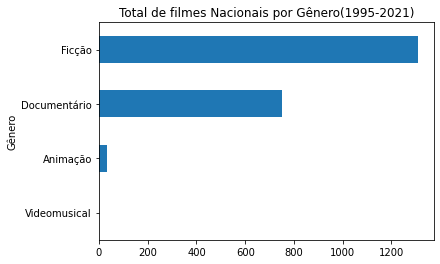

In [56]:
df.groupby("G√™nero")["T√≠tulo"].nunique().sort_values(ascending=True).plot.barh(title="Total de filmes Nacionais por G√™nero(1995-2021)")

##Quantidade de filmes lan√ßados por ano

###Tabela

In [57]:
df.groupby("Ano de Lan√ßamento")["T√≠tulo"].nunique()

Ano de Lan√ßamento
1995     14
1996     18
1997     21
1998     23
1999     28
2000     23
2001     30
2002     29
2003     30
2004     49
2005     46
2006     71
2007     78
2008     79
2009     84
2010     74
2011    100
2012     83
2013    129
2014    114
2015    133
2016    142
2017    160
2018    182
2019    167
2020     59
2021    129
Name: T√≠tulo, dtype: int64

###Gr√°fico

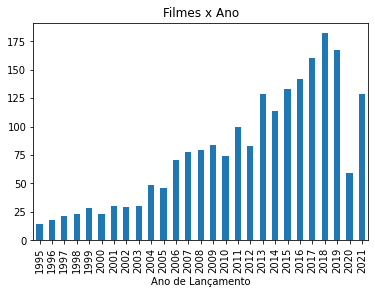

In [58]:
df.groupby("Ano de Lan√ßamento")["T√≠tulo"].nunique().plot.bar(title="Filmes x Ano")

##Encontrando Rendas n√£o Identificadas

In [51]:
(df['Renda (R$)'].eq('ND')).any()

True

In [52]:
(df['Renda (R$)'].eq('ND')).sum()

25

In [69]:
renda_nao_identificada=df[df['Renda (R$)'].str.match('ND')]
renda_nao_identificada

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
121               2000                          B0400163400000   
217               2004                          B0300045900000   
242               2004                          B0500408600000   
298               2005                          B0500279400000   
299               2005                          B0500247600000   
314               2006                          B0600500500000   
318               2006                          B0600476000000   
337               2006                          B1101450100000   
387               2007                          B0700676700000   
415               2007                          B0600555700000   
439               2007                          B0500445600000   
479               2008                          B0700799500000   
516               2008                          B0800850800000   
587               2009                          B1101495000000   
615               2009                                 Sem CPB   
661               2010                          B1101395900000   
704               2011                          B1101383500000   
773               2011                          B1101435200000   
811               2012                          B1201641300000   
839               2012                          B1201650700000   
858               2012                          B1201566400000   
897               2013                          B1301860500000   
979               2013                          B1301916600000   
1068              2014                          B1302025600000   
1088              2014                          B1302025400000   

                                                 T√≠tulo  \
121         Pierre Verger: Mensageiro Entre Dois Mundos   
217                                                  33   
242                                Motoboys - Vida Loca   
298                                      Preto E Branco   
299                                     Preto No Branco   
314                               A Festa De Margarette   
318               A Odiss√©ia Musical De Gilberto Mendes   
337                                Do Outro Lado Do Rio   
387                          A Hist√≥ria Das Tr√™s Marias   
415               Inacredit√°vel - A Batalha Dos Aflitos   
439              Pampulha Ou A Inven√ß√£o Do Mar De Minas   
479                                              Condor   
516                                      O Sal Da Terra   
587   Naufr√°gio - Mist√©rio E Morte Na Cat√°strofe Do ...   
615                                   Vamos Subir, Le√£o   
661                                       Luto Como M√£e   
704                           A √öltima Estrada Da Praia   
773           Porta A Porta ‚Äì A Pol√≠tica Em Dois Tempos   
811                  Clementina De Jesus - Rainha Quel√©   
839                                        Luto Em Luta   
858                                           Ponto Org   
897                                   As Horas Vulgares   
979                                      Quase Um Tango   
1068                                          Mar Negro   
1088                        O √öltimo Lance De Um Leil√£o   

                                 Dire√ß√£o        G√™nero  \
121             Lula Buarque De Hollanda  Document√°rio   
217                         Kiko Goifman  Document√°rio   
242                          Caito Ortiz        Fic√ß√£o   
298                         Carlos Nader  Document√°rio   
299                       Ronaldo German        Fic√ß√£o   
314                        Renato Falc√£o        Fic√ß√£o   
318       Carlos De Moura Ribeiro Mendes  Document√°rio   
337                       Lucas Bambozzi  Document√°rio   
387        Silvana Soares/Zackia Resende        Fic√ß√£o   
415                           Beto Souza  Document√°rio   
439                     Oswaldo Caldeira  Document√°rio   
479               

##Eliminando as linhas com filmes sem renda identificada

In [75]:
df=df.drop([121,217,242,298,299,314,318,337,387,415,439,479,516,587,615,661,704,773,811,839,858,897,979,1068,1088],0)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
0                 1995                          B0400064200000   
1                 1995                          B0500310700000   
2                 1995                          B0500264600000   
3                 1995                                     NaN   
4                 1995                          B0300012900000   
...                ...                                     ...   
2090              2021                          B2100339400000   
2091              2021                          B2100281200000   
2092              2021                          B2100259600000   
2093              2021                          B2000059800000   
2094              2021                          B2000042900000   

                                       T√≠tulo  \
0                             A Causa Secreta   
1        Carlota Joaquina, Princesa Do Brazil   
2     Carmen Miranda - Bananas Is My Business   
3                          Cinema De L√°grimas   
4                                 Efeito Ilha   
...                                       ...   
2090                           Virando A Mesa   
2091                    Voc√™ N√£o √â Um Soldado   
2092                          Wandering Heart   
2093                     Wild - Rede Selvagem   
2094                                    Zimba   

                                                Dire√ß√£o        G√™nero  \
0                                        S√©rgio Bianchi        Fic√ß√£o   
1                                        Carla Camurati        Fic√ß√£o   
2                                        Helena Solberg  Document√°rio   
3                             Nelson Pereira Dos Santos        Fic√ß√£o   
4                                  Luiz Alberto Pereira        Fic√ß√£o   
...                                                 ...           ...   
2090                        Caio Nogueira Cobra Varajao        Fic√ß√£o   
2091         Maria Carolina Telles, Aleksei Wrobel Abib  Document√°rio   
2092                   Leonardo Esteban Brzezicki Conde        Fic√ß√£o   
2093  Julio Boucada Mauro Inacio Peixoto, Dener Jose...  Document√°rio   
2094                                 Joel Pizzini Filho  Document√°rio   

               Empresa Produtora Brasileira Majorit√°ria     UF Distribuidora  \
0                     Agravo Produ√ß√µes Cinematogr√°ficas     SP      Riofilme   
1                         Copacabana Filmes E Produ√ß√µes     RJ        Elimar   
2                                       Radiante Filmes     RJ      Riofilme   
3                                  Meta V√≠deo Produ√ß√µes     RJ      Riofilme   
4                                              Lapfilme     SP      Riofilme   
...                                                 ...    ...           ...   
2090  Media Bridge Produ√ß√µes Ltda / Paris Produ√ß√µes ...  RJ/SP         Paris   
2091                      Elo Audiovisual Servi√ßos Ltda     SP   Elo Company   
2092                        Camisa Treze Cultural Ltda      SP   Elo Company   
2093        Dg Consultoria E Comunica√ß√£o Ambiental Ltda     DF  Bretz Filmes   
2094                         Leminiscata Filmes Ltda-Me     SP  Bretz Filmes   

        P√∫blico    Renda (R$)  
0         3.000     15.000,00  
1     1.286.000  6.430.000,00  
2        15.470     90.000,00  
3         1.575      7.500,00  
4         3.000     15.000,00  
...         ...           ...  
2090         37        542,06  
2091         24         52,00  
2092         20        399,80  
2093         16        276,32  
2094         58      1.037,03  

[2070 rows x 10 columns]

In [76]:
(df['Renda (R$)'].eq('ND')).any()

False

##Convertendo tipo da coluna 'Renda (R$)'

In [77]:
df['Renda (R$)']=df['Renda (R$)'].apply(lambda x: float(x.replace('.','').replace(',','.')))
print(df['Renda (R$)'])

0         15000.00
1       6430000.00
2         90000.00
3          7500.00
4         15000.00
           ...    
2090        542.06
2091         52.00
2092        399.80
2093        276.32
2094       1037.03
Name: Renda (R$), Length: 2070, dtype: float64


##M√≠nima Renda

In [78]:
df['Renda (R$)'].min()

10.0

In [89]:
df.loc[df['Renda (R$)']==10.0]

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)         T√≠tulo  \
1946              2020                          B1800553200000  New Life S.A.   

                Dire√ß√£o  G√™nero Empresa Produtora Brasileira Majorit√°ria  UF  \
1946  Andr√© Carvalheira  Fic√ß√£o                           Machado Filmes  DF   

       Distribuidora P√∫blico  Renda (R$)  
1946  Pandora Filmes       2        10.0

##M√°xima Renda

In [79]:
df['Renda (R$)'].max()

169895668.13

In [90]:
df.loc[df['Renda (R$)']==169895668.13]

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
1842              2019                          B1900576900000   

                      T√≠tulo        Dire√ß√£o  G√™nero  \
1842  Minha M√£e √â Uma Pe√ßa 3  Susana Garcia  Fic√ß√£o   

     Empresa Produtora Brasileira Majorit√°ria  UF   Distribuidora     P√∫blico  \
1842                            Migdal Filmes  RJ  Downtown/Paris  10.978.012   

        Renda (R$)  
1842  1.698957e+08

##Conferindo integridade dos dados

In [91]:
df.head()

Ano de Lan√ßamento Certificado de Produto Brasileiro (CPB)  \
0              1995                          B0400064200000   
1              1995                          B0500310700000   
2              1995                          B0500264600000   
3              1995                                     NaN   
4              1995                          B0300012900000   

                                    T√≠tulo                    Dire√ß√£o  \
0                          A Causa Secreta             S√©rgio Bianchi   
1     Carlota Joaquina, Princesa Do Brazil             Carla Camurati   
2  Carmen Miranda - Bananas Is My Business             Helena Solberg   
3                       Cinema De L√°grimas  Nelson Pereira Dos Santos   
4                              Efeito Ilha       Luiz Alberto Pereira   

         G√™nero Empresa Produtora Brasileira Majorit√°ria  UF Distribuidora  \
0        Fic√ß√£o        Agravo Produ√ß√µes Cinematogr√°ficas  SP      Riofilme   
1        Fic√ß√£o            Copacabana Filmes E Produ√ß√µes  RJ        Elimar   
2  Document√°rio                          Radiante Filmes  RJ      Riofilme   
3        Fic√ß√£o                     Meta V√≠deo Produ√ß√µes  RJ      Riofilme   
4        Fic√ß√£o                                 Lapfilme  SP      Riofilme   

     P√∫blico  Renda (R$)  
0      3.000     15000.0  
1  1.286.000   6430000.0  
2     15.470     90000.0  
3      1.575      7500.0  
4      3.000     15000.0